In [1]:
import base_wavelet_model
import tensorflow as tf
import pickle
import tensorflow.keras as keras
from importlib import reload
import novel_activations
import os
import hypothesis_tests
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
reload(hypothesis_tests)

<module 'hypothesis_tests' from 'c:\\Users\\anash\\Downloads\\fyp\\Experiments\\hypothesis_tests.py'>

In [3]:
def experiment_completed(exp_name):
    return "result_plots.png" in os.listdir("Tensorboard/"+exp_name)

# Empirical Experiments

## Comparing Losses

In [4]:
allmodels = os.listdir("Tensorboard")

# differentiators for different experiments
key_indications = ["Stanford", "Wavelet Style", "Trainable Wavelet"]
full_names = ["ResNet", "Compact Wavelet-Residual", "Wavelet"]
hyps = {}
labels = {}

for name in key_indications:
    models =[x for x in allmodels if experiment_completed(x) and name in x and 'kernel' not in name]

    hyp = hypothesis_tests.HypothesisTest(models[0])
    mod_names=[models[0] for _ in range(len(hyp.get_val_loss()))]
    for i in range(1, len(models)):
        oldlen=len(hyp.get_val_loss())
        hyp.combine(models[i])
        mod_names+=[models[i] for _ in range(len(hyp.get_val_loss())-oldlen)]

    hyps[name] = hyp
    labels[name] = mod_names


Text(0, 0.5, 'Validation cross-entropy loss')

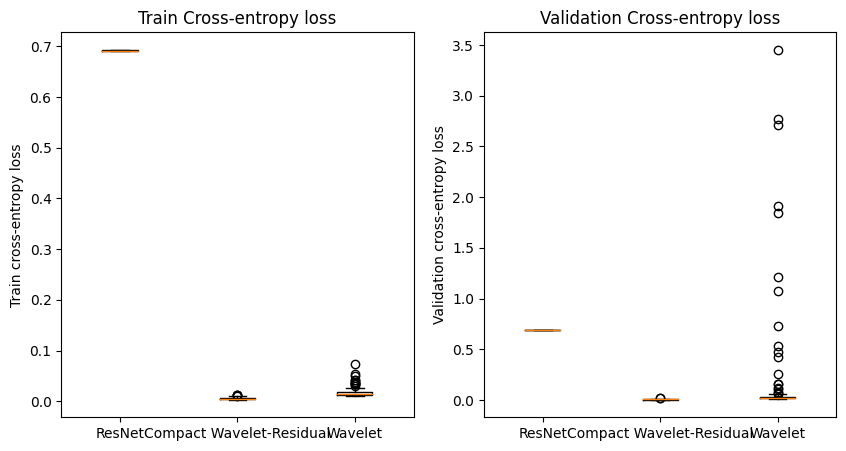

In [88]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot( [hyps[x].get_train_loss() for x in key_indications])
ax[0].set_title("Train Cross-entropy loss")
ax[0].set_xticks(range(1,1+len(hyps)),full_names)
ax[0].set_ylabel("Train cross-entropy loss")
ax[1].boxplot( [hyps[x].get_val_loss() for x in key_indications])
ax[1].set_title("Validation Cross-entropy loss")
ax[1].set_xticks(range(1,1+len(hyps)),full_names)
ax[1].set_ylabel("Validation cross-entropy loss")

Text(0, 0.5, 'Validation cross-entropy loss')

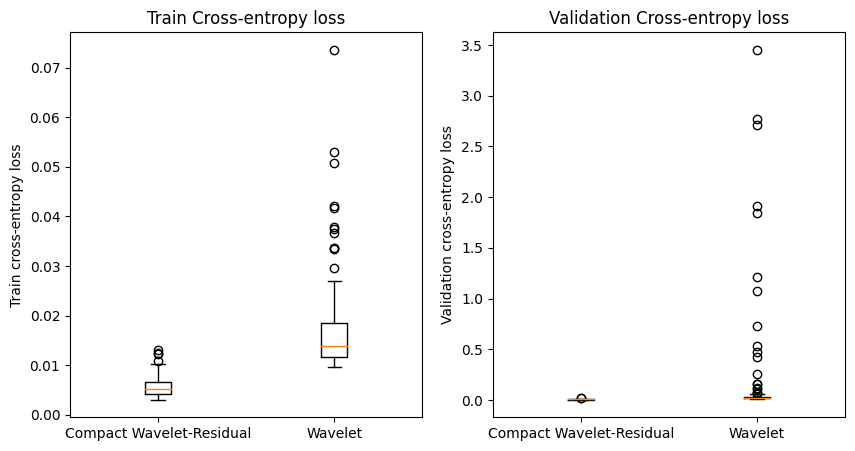

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot( [hyps[x].get_train_loss() for x in key_indications[1:]])
ax[0].set_title("Train Cross-entropy loss")
ax[0].set_xticks(range(1,len(hyps)),full_names[1:])
ax[0].set_ylabel("Train cross-entropy loss")
ax[1].boxplot( [hyps[x].get_val_loss() for x in key_indications[1:]])
ax[1].set_title("Validation Cross-entropy loss")
ax[1].set_xticks(range(1,len(hyps)),full_names[1:])
ax[1].set_ylabel("Validation cross-entropy loss")

# Model optimisation

The lack of variabolity in the ResNet mdoels result in a lack of a need to choose an omtimal model.

However, there is a greater degree of variability beween the waveet models.


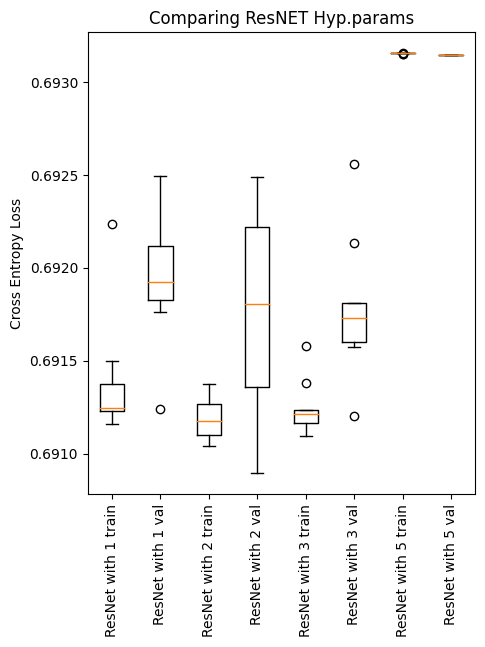

In [68]:
x="Stanford"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        names.append(' '.join(lab.split()[-4:]).replace(" blocks", "")+ " train")
        names.append(' '.join(lab.split()[-4:]).replace(" blocks", "")+" val")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


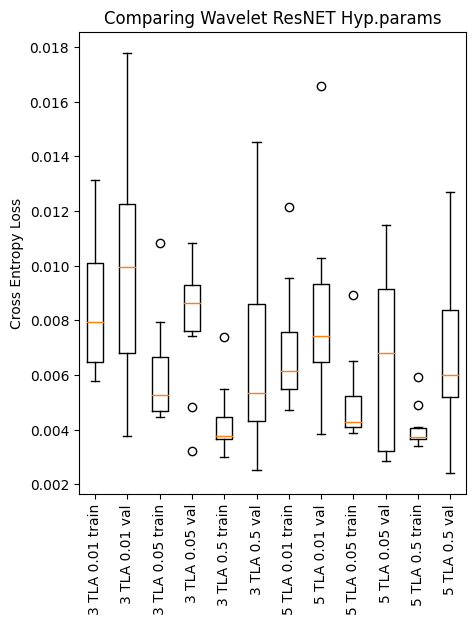

In [66]:
x="Wavelet Style"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        names.append(' '.join(lab.split()[-4:]).replace(" blocks", "")+ " train")
        names.append(' '.join(lab.split()[-4:]).replace(" blocks", "")+" val")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing Wavelet ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


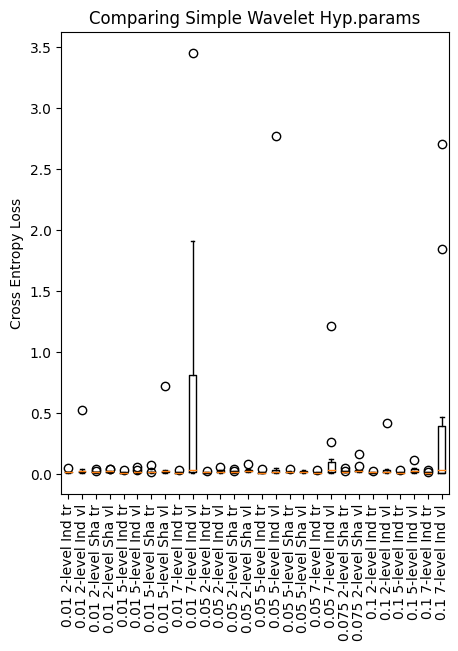

In [82]:
x="Trainable Wavelet"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        exp_name = lab.split()
        exp_name = ' '.join(exp_name[3:5])+' '+exp_name[5][:3]
        names.append(exp_name+ " tr")
        names.append(exp_name+" vl")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing Simple Wavelet Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


In [80]:
%matplotlib inline

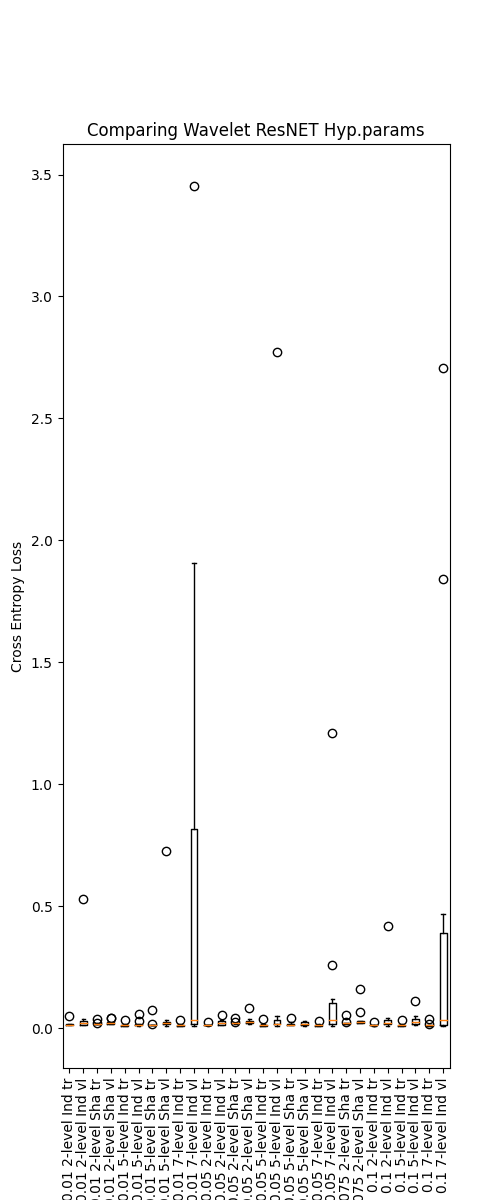

In [79]:
x="Trainable Wavelet"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        exp_name = lab.split()
        exp_name = ' '.join(exp_name[3:5])+' '+exp_name[5][:3]
        names.append(exp_name+ " tr")
        names.append(exp_name+" vl")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,12))
plt.boxplot(boxes)
plt.title("Comparing Wavelet ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


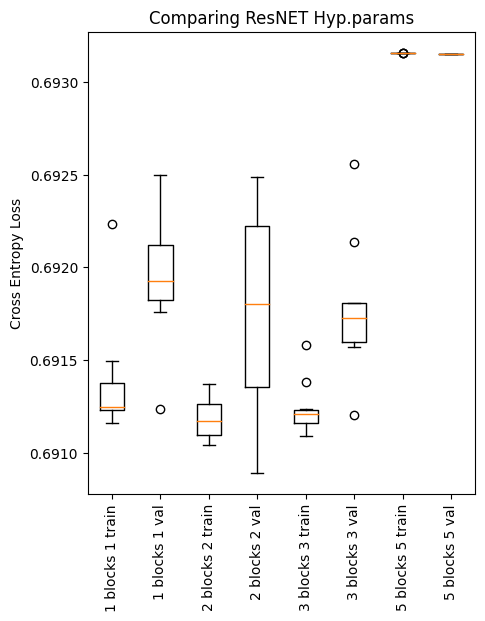

In [95]:
x="Stanford"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        exp_name = lab.split()
        exp_name = ' '.join(exp_name[-2:])+' '+exp_name[5][:3]
        names.append(exp_name+ " train")
        names.append(exp_name+" val")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


### More Sophisticated Wavelet ResNET

Choose 5 0.05 with 32 and 64 kernels

# WARNING ERROR IN VALUES

In [ ]:
name = x = "kernels"
models =[x for x in allmodels if experiment_completed(x) and name in x]

hyp = hypothesis_tests.HypothesisTest(models[0])
mod_names=[models[0] for _ in range(len(hyp.get_val_loss()))]
for i in range(1, len(models)):
    oldlen=len(hyp.get_val_loss())
    hyp.combine(models[i])
    mod_names+=[models[i] for _ in range(len(hyp.get_val_loss())-oldlen)]

boxes = []
names = []
mapping = {}
for i in range(len(hyp.get_val_loss())):
    lab = mod_names[i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        exp_name = lab.split()
        exp_name = exp_name[-2]
        names.append(exp_name+ " train")
        names.append(exp_name+" val")
    boxes[mapping[lab]].append(hyp.get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyp.get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

## Evaluate Further metrics on our chosen set of models

Consider the loss over solely the true R peak locations

Effectively, looking at the false negative rate - to verify that the wavelet models aren't overly biased in favour of generating a "flat" prediction

In [5]:
def create_hyp(l):
    m = hypothesis_tests.HypothesisTest(l[0])
    for i in range(1, len(l)):
        m.combine(l[i])
    return m

In [6]:
resnetMods = [
    "Stanford ML Style ResNet with 1 blocks", "Stanford ML Style ResNet with 2 blocks", "Stanford ML Style ResNet with 3 blocks"
]
resnetExp = create_hyp(resnetMods)

smallWaveletResnetMods = ["Wavelet Style ResNet with 5 blocks TLA 0.05"]
smallWaveletResnetExp = create_hyp(smallWaveletResnetMods)

fullWaveletResnetMods = ["Wavelet Full ResNet with 5 blocks TLA 0.05 - 32 kernels"]
fullWaveletResnetExp = create_hyp(fullWaveletResnetMods)

hardCodedWaveletIndMods = ["TLA Min Grad 0.01 5-level Independent Trainable Wavelet", "TLA Min Grad 0.05 5-level Independent Trainable Wavelet"]
hardCodedWaveletIndExp = create_hyp(hardCodedWaveletIndMods)
hardCodedWaveletQMFMods = ["TLA Min Grad 0.01 5-level Independent Trainable Wavelet", "TLA Min Grad 0.05 5-level Shared QMF Trainable Wavelet"]
hardCodedWaveletQMFExp = create_hyp(hardCodedWaveletQMFMods)

#### Overall Losses

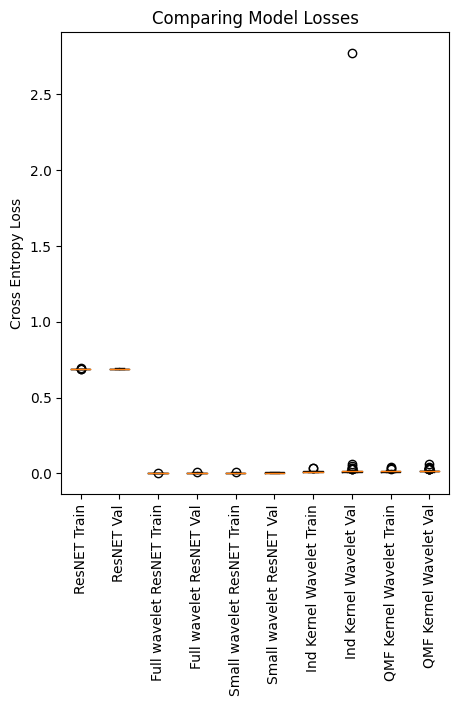

In [7]:
mods = ["ResNET", "Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [resnetExp, fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
boxes = [[] for i in range(len(mods*2))]
names = []
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    boxes[i*2]=np.concatenate([boxes[i*2], hyp.get_train_loss()])
    boxes[i*2 + 1]=np.concatenate([boxes[i*2], hyp.get_val_loss()])
    #boxes[mapping[lab]+1].append(hyp.get_val_loss()[i])
    names.append(lab+' Train')
    names.append(lab+' Val')
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing Model Losses")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

In [118]:
%matplotlib inline

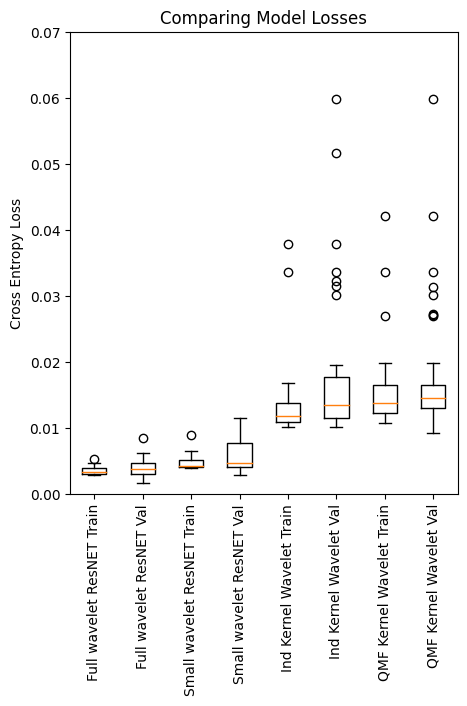

In [8]:
mods = ["Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [ fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
boxes = [[] for i in range(len(mods*2))]
names = []
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    boxes[i*2]=np.concatenate([boxes[i*2], hyp.get_train_loss()])
    boxes[i*2 + 1]=np.concatenate([boxes[i*2], hyp.get_val_loss()])
    #boxes[mapping[lab]+1].append(hyp.get_val_loss()[i])
    names.append(lab+' Train')
    names.append(lab+' Val')
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.ylim(0,0.07)
plt.title("Comparing Model Losses")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

#### Loss only on the validation R peak locations

0 of 30, 10 of 30, 20 of 30, 0 of 10, 0 of 10, 0 of 20, 10 of 20, 0 of 20, 10 of 20, 

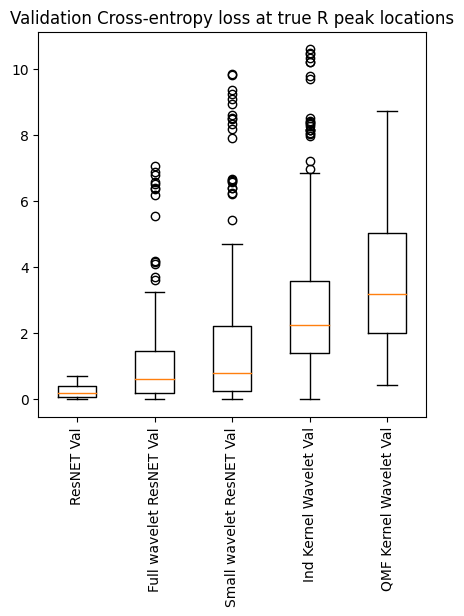

In [9]:
mods = ["ResNET","Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [resnetExp, fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
boxes = [[] for i in range(len(mods))]
names = []
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    boxes[i]=hyp.get_r_peak_loss()
    names.append(lab+' Val')
plt.figure(figsize=(5,5))
plt.boxplot( boxes)
plt.title("Validation Cross-entropy loss at true R peak locations")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

In [32]:
scipy.stats.mannwhitneyu(resnetExp.get_r_peak_loss(), fullWaveletResnetExp.get_r_peak_loss(), alternative="less")

MannwhitneyuResult(statistic=29072.0, pvalue=3.407819465628007e-23)

Significantly lower c.v. validation loss

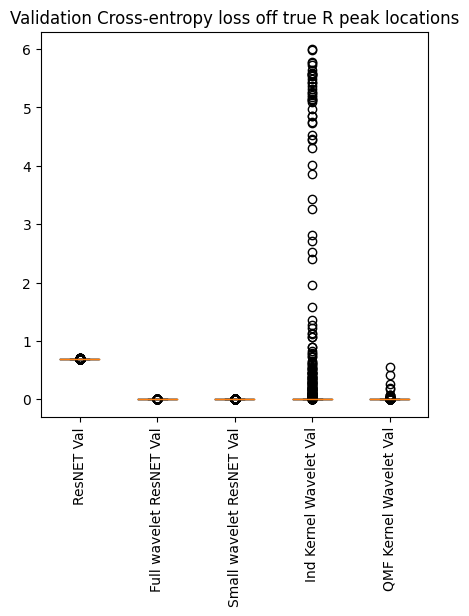

In [30]:
mods = ["ResNET","Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [resnetExp, fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
boxes = [[] for i in range(len(mods))]
names = []
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    boxes[i]=np.concatenate([boxes[i], hyp.get_non_r_peak_loss()])
    names.append(lab+' Val')
plt.figure(figsize=(5,5))
plt.boxplot( boxes)
plt.title("Validation Cross-entropy loss off true R peak locations")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

In [35]:
scipy.stats.mannwhitneyu(resnetExp.get_non_r_peak_loss(), fullWaveletResnetExp.get_non_r_peak_loss(), alternative="greater")

MannwhitneyuResult(statistic=8957952.0, pvalue=0.0)

In [42]:
scipy.stats.mannwhitneyu(np.concatenate(fullWaveletResnetExp.preds), np.concatenate(resnetExp.preds), alternative="greater")

MannwhitneyuResult(statistic=3435117.0, pvalue=1.0)

In [43]:
scipy.stats.mannwhitneyu(np.concatenate(fullWaveletResnetExp.trues), np.concatenate(resnetExp.trues), alternative="less")

MannwhitneyuResult(statistic=34799023426.5, pvalue=0.0)

Significantly higher loss on non R peaks

Caused by signficicantly lower R peak predictions, and non-R peak predictions

##### Distributions of Predictions

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

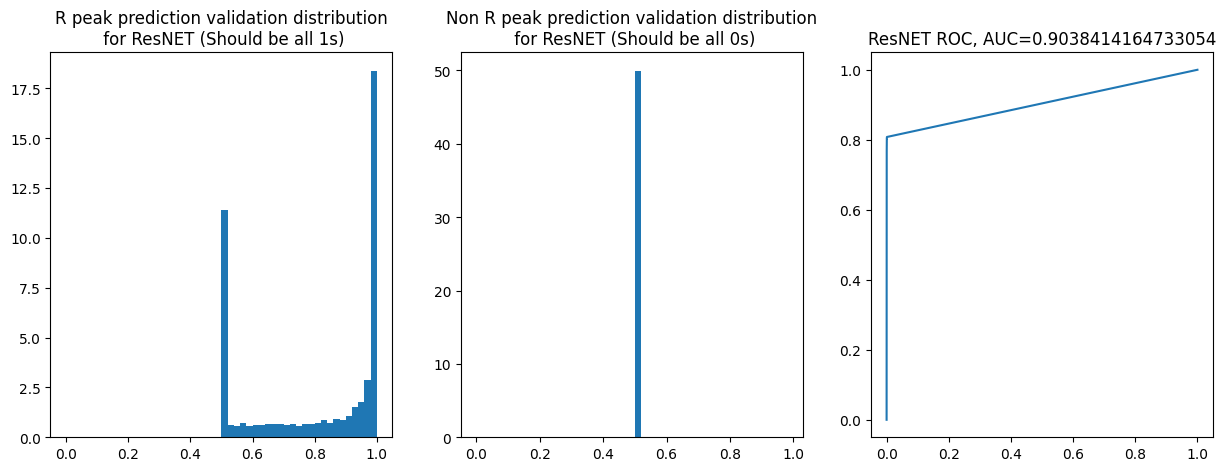

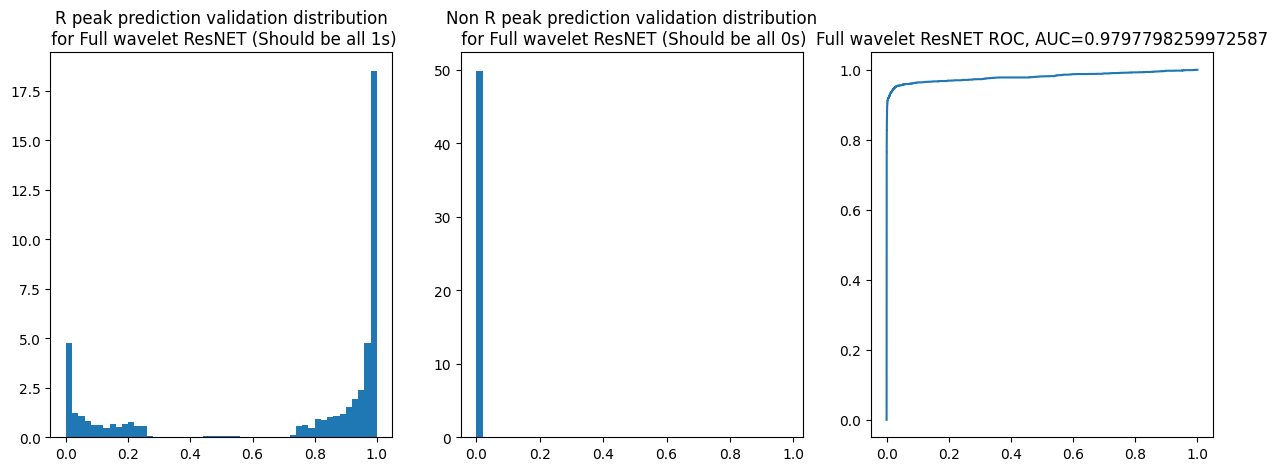

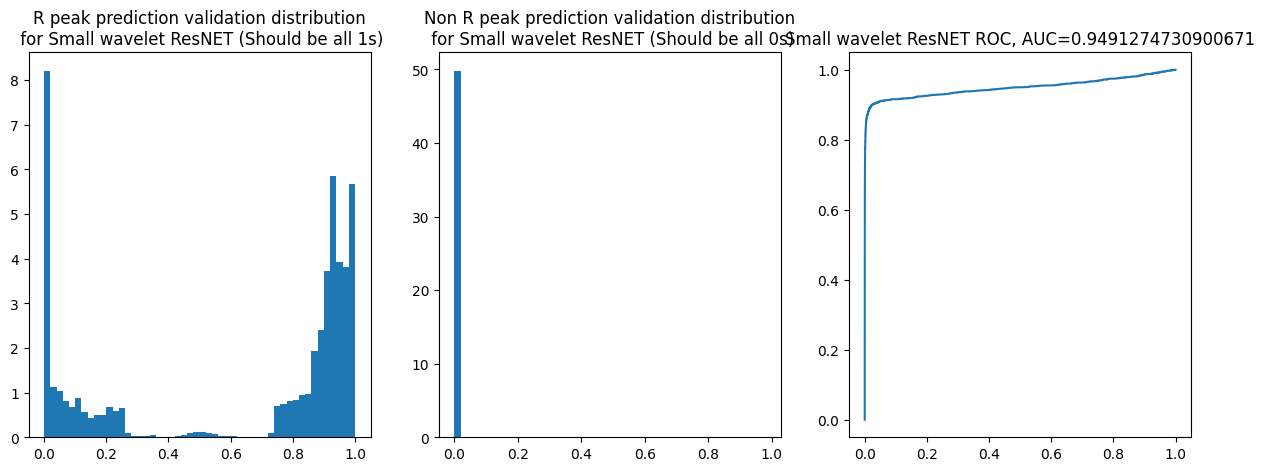

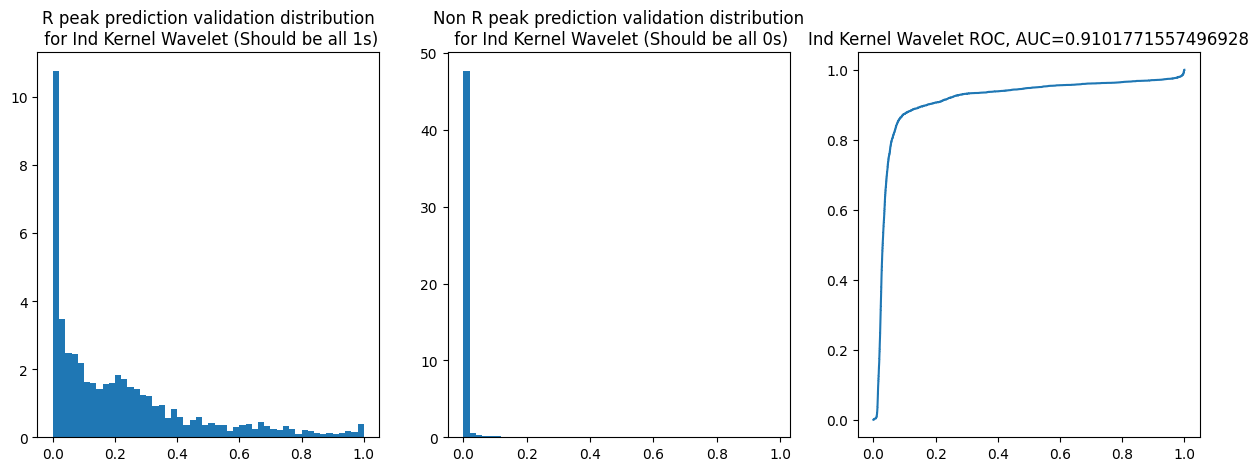

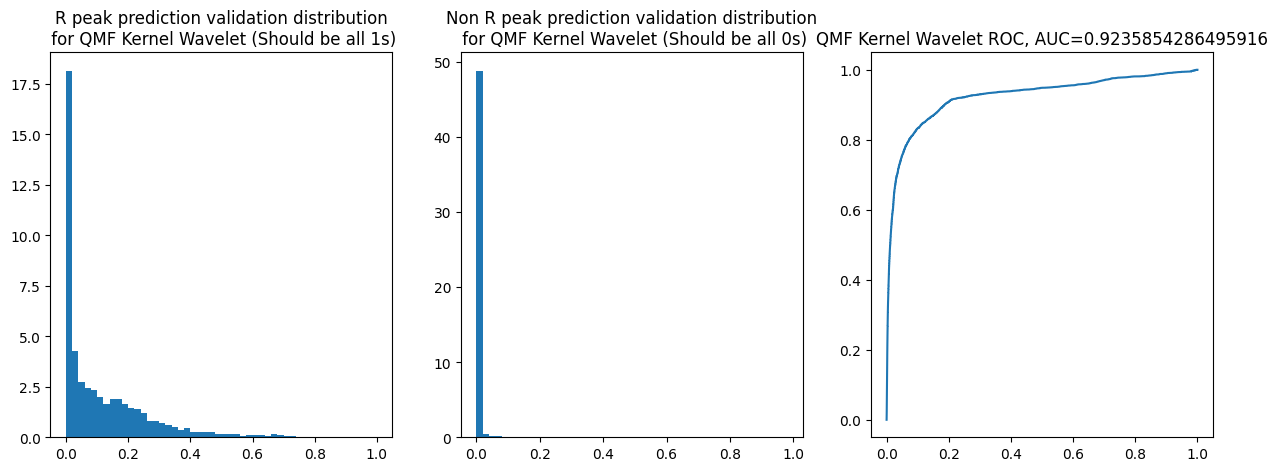

In [14]:
mods = ["ResNET","Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [resnetExp, fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    preds=np.concatenate(hyp.preds)
    fig,ax=plt.subplots(1, 3,figsize=(15,5))
    ax[0].hist(preds,bins=np.arange(0, 1.02, 0.02),density=True)
    ax[0].set_title(f"R peak prediction validation distribution\n for {lab} (Should be all 1s)")
    

    trues=np.concatenate(hyp.trues)
    ax[1].hist(trues,bins=np.arange(0, 1, 0.02),density=True)
    ax[1].set_title(f"Non R peak prediction validation distribution\n for {lab} (Should be all 0s)")

    fp, tp, _ = roc_curve([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    auc = roc_auc_score([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    ax[2].plot(fp, tp)
    ax[2].set_title(f"{lab} ROC, AUC={auc}")
    plt.show()

#### Comparing the ResNET Models

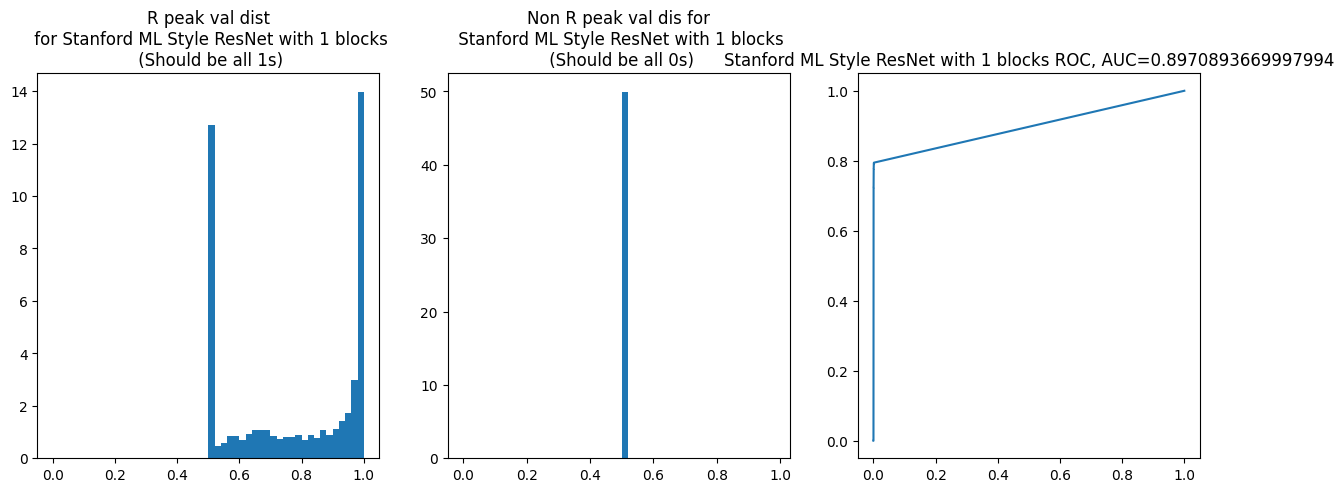

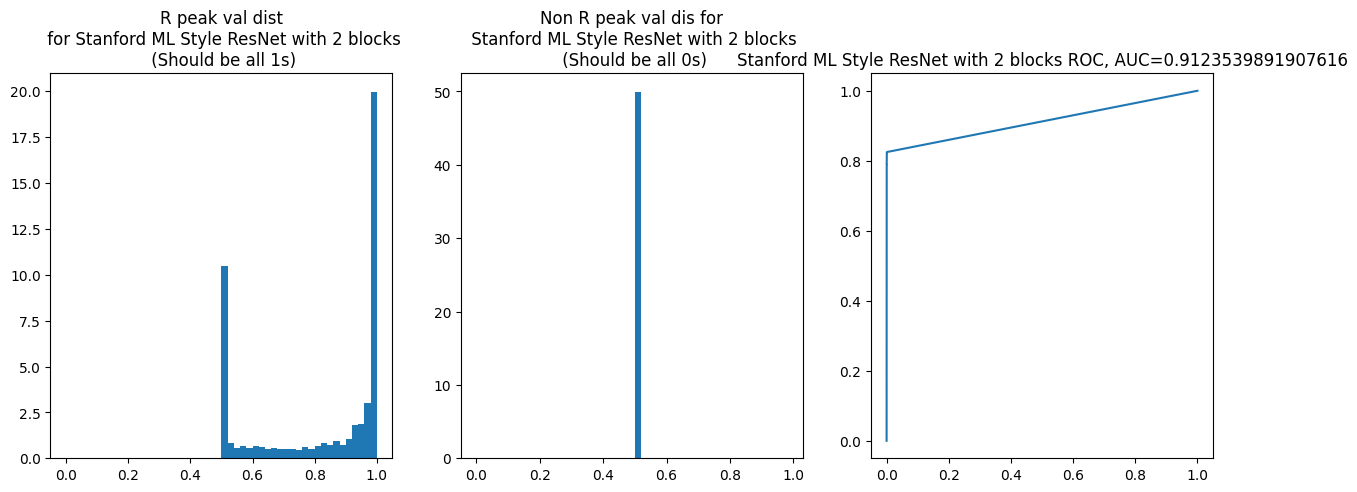

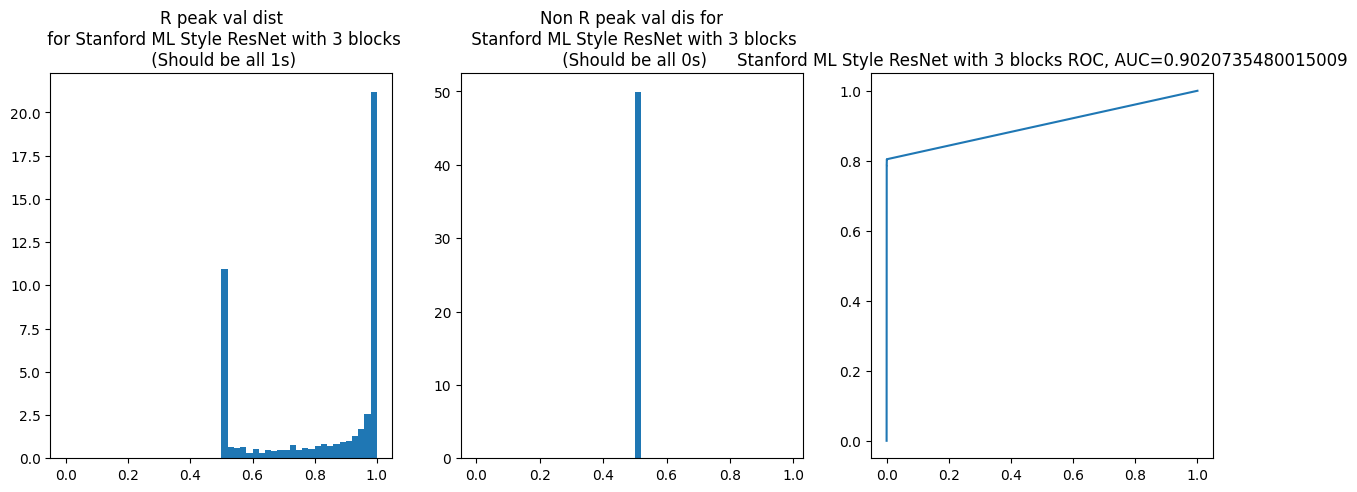

In [201]:
mods = ['Stanford ML Style ResNet with 1 blocks','Stanford ML Style ResNet with 2 blocks','Stanford ML Style ResNet with 3 blocks']
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    preds=np.concatenate([resnetExp.preds[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
    fig,ax=plt.subplots(1, 3,figsize=(15,5))
    ax[0].hist(preds,bins=np.arange(0, 1.02, 0.02),density=True)
    ax[0].set_title(f"R peak val dist\n for {lab}\n (Should be all 1s)")

   
    trues=np.concatenate([resnetExp.trues[x] for x in np.where(np.array(resnetExp.trueMods)==lab)[0]])
    ax[1].hist(trues,bins=np.arange(0, 1, 0.02),density=True)
    ax[1].set_title(f"Non R peak val dis for\n {lab}\n (Should be all 0s)")

    fp, tp, _ = roc_curve([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    auc = roc_auc_score([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    ax[2].plot(fp, tp)
    ax[2].set_title(f"{lab} ROC, AUC={auc}")
    plt.show()

#### Full Wavelet

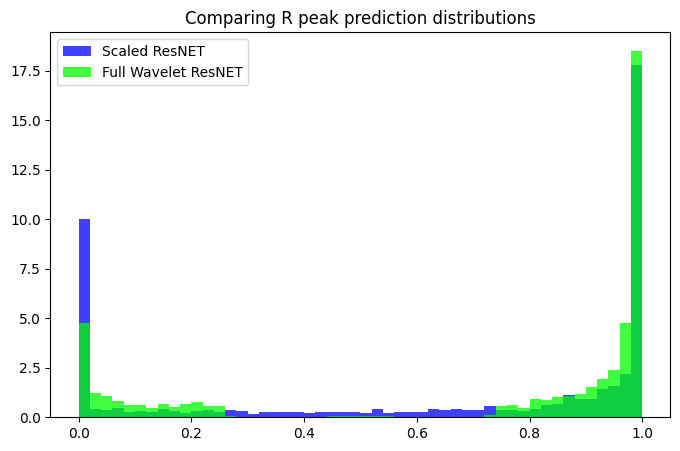

In [15]:
lab ='Stanford ML Style ResNet with 2 blocks'
preds=np.concatenate([resnetExp.preds[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
plt.figure(figsize=(8,5))
plt.hist((preds-np.min(preds))*2,bins=np.arange(0, 1.02, 0.02),density=True, fc=(0, 0, 1, 0.75), label="Scaled ResNET")
plt.hist(np.concatenate(fullWaveletResnetExp.preds),bins=np.arange(0, 1.02, 0.02),density=True,fc=(0, 1, 0, 0.75), label="Full Wavelet ResNET")
plt.title(f"Comparing R peak prediction distributions")
plt.legend()

In [19]:
lab='Stanford ML Style ResNet with 2 blocks'
resNet2 = (np.concatenate([resnetExp.preds[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])-0.5)**2
waveNet = (np.concatenate(fullWaveletResnetExp.preds)-0.5)**2
scipy.stats.mannwhitneyu(waveNet, resNet2, alternative="greater")

MannwhitneyuResult(statistic=3548173.5, pvalue=1.0734099773642042e-19)

Significantly higher degreee of separation between predicted 1 and 0 classes

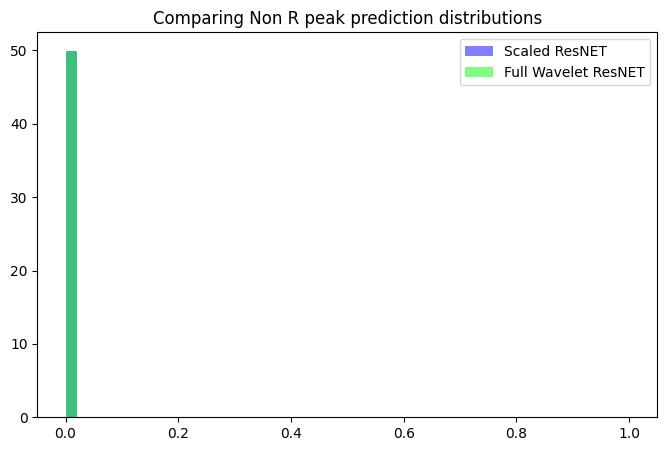

In [26]:
lab ='Stanford ML Style ResNet with 2 blocks'
preds=np.concatenate([resnetExp.trues[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
plt.figure(figsize=(8,5))
plt.hist((preds-np.min(preds))*2,bins=np.arange(0, 1.02, 0.02),density=True, fc=(0, 0, 1, 0.5), label="Scaled ResNET")
plt.hist(np.concatenate(fullWaveletResnetExp.trues),bins=np.arange(0, 1.02, 0.02),density=True,fc=(0, 1, 0, 0.5), label="Full Wavelet ResNET")
plt.title(f"Comparing Non R peak prediction distributions")
plt.legend()

Completely overlapping

#### Comparing the Effects of the gradient parameter

In [37]:
exp05 = hypothesis_tests.HypothesisTest("Wavelet Style ResNet with 5 blocks TLA 0.05")
exp01 = hypothesis_tests.HypothesisTest("Wavelet Style ResNet with 5 blocks TLA 0.01")

In [38]:
exp01.get_r_peak_loss()
exp05.get_r_peak_loss()
None

0 of 10, 0 of 10, 

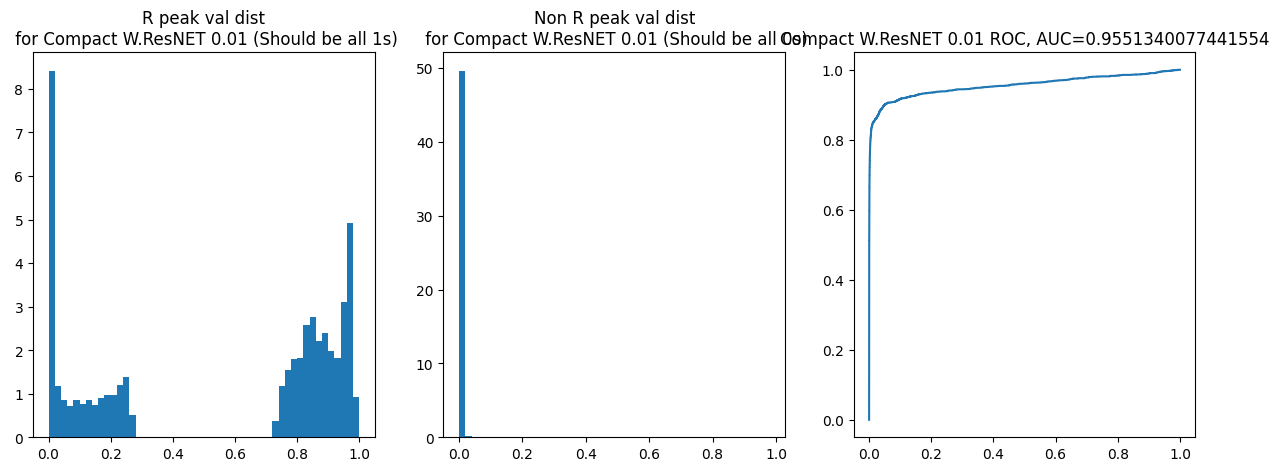

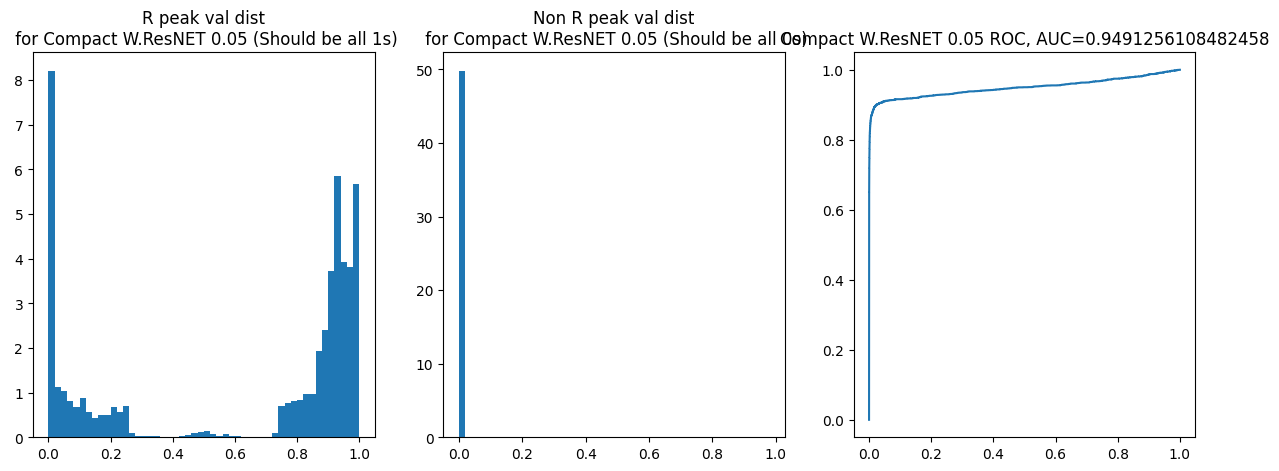

In [168]:
mods = ["Compact W.ResNET 0.01","Compact W.ResNET 0.05"]
exps = [exp01,exp05]
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    preds=np.concatenate(hyp.preds)
    fig,ax=plt.subplots(1, 3,figsize=(15,5))
    ax[0].hist(preds,bins=np.arange(0, 1.02, 0.02),density=True)
    ax[0].set_title(f"R peak val dist\n for {lab} (Should be all 1s)")

   
    trues=np.concatenate(hyp.trues)
    ax[1].hist(trues,bins=np.arange(0, 1, 0.02),density=True)
    ax[1].set_title(f"Non R peak val dist\n for {lab} (Should be all 0s)")

    fp, tp, _ = roc_curve([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    auc = roc_auc_score([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    ax[2].plot(fp, tp)
    ax[2].set_title(f"{lab} ROC, AUC={auc}")
    plt.show()

### Contrast these histograms

In [40]:
scipy.stats.mannwhitneyu(np.concatenate(fullWaveletResnetExp.preds), np.concatenate(exp01.preds), alternative="greater")

MannwhitneyuResult(statistic=5712447.0, pvalue=7.560243580677618e-144)

There is a definite imrpovement in the full model's ability to identify the R peaks

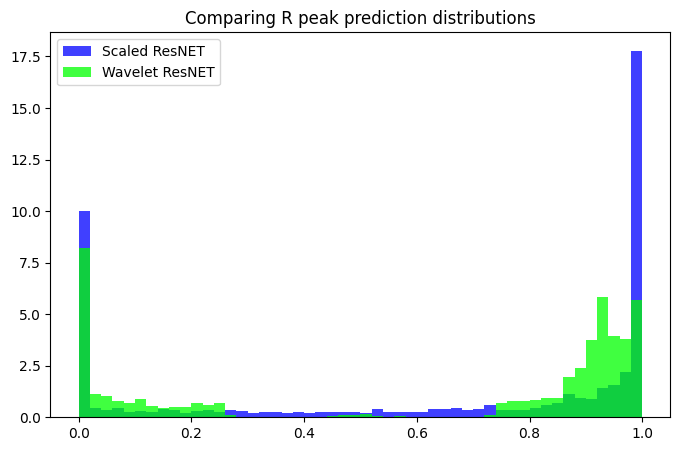

In [209]:
lab ='Stanford ML Style ResNet with 2 blocks',
preds=np.concatenate([resnetExp.preds[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
plt.figure(figsize=(8,5))
plt.hist((preds-np.min(preds))*2,bins=np.arange(0, 1.02, 0.02),density=True, fc=(0, 0, 1, 0.75), label="Scaled ResNET")
plt.hist(np.concatenate(exp05.preds),bins=np.arange(0, 1.02, 0.02),density=True,fc=(0, 1, 0, 0.75), label="Wavelet ResNET")
plt.title(f"Comparing R peak prediction distributions")
plt.legend()

In [246]:
resNet2 = resnetExp.final_val_losses[10:20]
waveNet = exp05.get_val_loss()
import scipy
scipy.stats.mannwhitneyu(waveNet, resNet2, alternative="less")

MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)

#### Hypothesis Tests

## Scratch

In [50]:
resnetRLoss = hyps["Stanford"].get_r_peak_loss()
waveletResnetLoss = hyps["Wavelet Style"].get_r_peak_loss()
waveletLoss = hyps["Trainable Wavelet"].get_r_peak_loss()

([<matplotlib.axis.XTick at 0x2b5e9f45600>,
 [Text(1, 0, 'ResNet'), Text(2, 0, 'Wavelet-Residual'), Text(3, 0, 'Wavelet')])

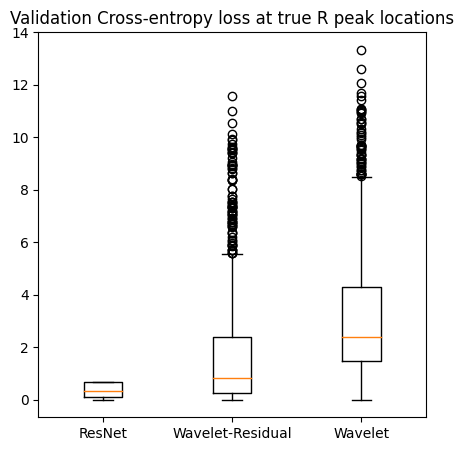

In [51]:
plt.figure(figsize=(5,5))
plt.boxplot( [resnetRLoss, waveletResnetLoss, waveletLoss])
plt.title("Validation Cross-entropy loss at true R peak locations")
plt.xticks(range(1,4),full_names)

In [52]:
resnetRLoss = hyps["Stanford"].get_non_r_peak_loss()
waveletResnetRLoss = hyps["Wavelet Style"].get_non_r_peak_loss()
waveletRLoss = hyps["Trainable Wavelet"].get_non_r_peak_loss()

([<matplotlib.axis.XTick at 0x2b515ba44c0>,
 [Text(1, 0, 'ResNet'), Text(2, 0, 'Wavelet-Residual'), Text(3, 0, 'Wavelet')])

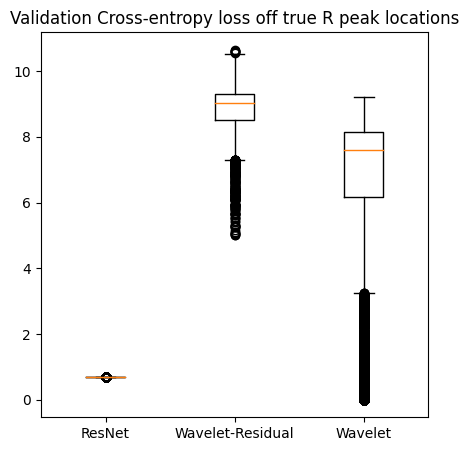

In [55]:
plt.figure(figsize=(5,5))
plt.boxplot( [resnetRLoss, waveletResnetRLoss, waveletRLoss])
plt.title("Validation Cross-entropy loss off true R peak locations")
plt.xticks(range(1,4),full_names)

# Distribution of predicted values at the R peaks

Text(0.5, 1.0, 'R peak predictions for ResNET \n(Should be all 1s)')

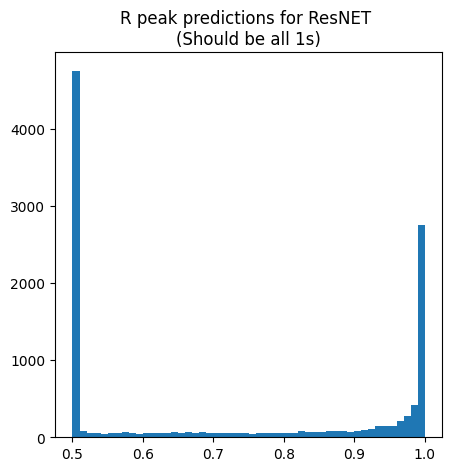

In [60]:
plt.figure(figsize=(5,5))
total = []
for x in hyps["Stanford"].preds:
    for v in x:
        total.append(v)
plt.hist(total,bins=50)
plt.title("R peak predictions for ResNET \n(Should be all 1s)")

Text(0.5, 1.0, 'R peak predictions for Wavelet ResNET \n(Should be all 1s)')

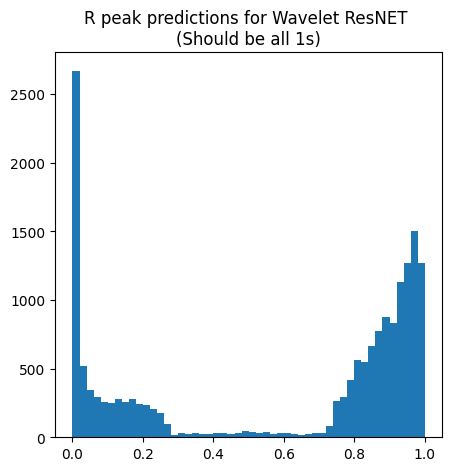

In [61]:
plt.figure(figsize=(5,5))
total = []
for x in hyps["Wavelet Style"].preds:
    for v in x:
        total.append(v)
plt.hist(total,bins=50)
plt.title("R peak predictions for Wavelet ResNET \n(Should be all 1s)")

Text(0.5, 1.0, 'R peak predictions for Wavelet \n(Should be all 1s)')

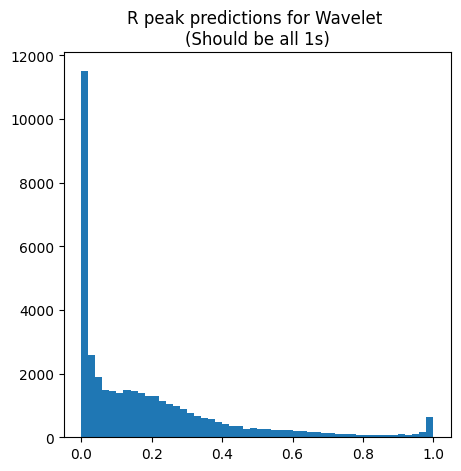

In [62]:
plt.figure(figsize=(5,5))
total = []
for x in hyps["Trainable Wavelet"].preds:
    for v in x:
        total.append(v)
plt.hist(total,bins=50)
plt.title("R peak predictions for Wavelet \n(Should be all 1s)")

# Distribution of predicted values off the R peaks

Text(0.5, 1.0, 'Non R peak predictions for ResNET \n(Should be all 0s)')

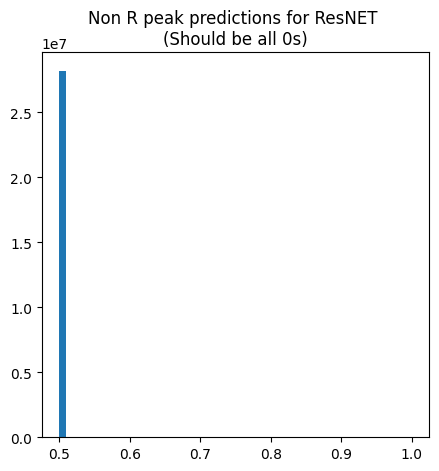

In [63]:
plt.figure(figsize=(5,5))
total = []
for x in hyps["Stanford"].trues:
    for v in x:
        total.append(v)
plt.hist(total,bins=50)
plt.title("Non R peak predictions for ResNET \n(Should be all 0s)")

Text(0.5, 1.0, 'Non R peak predictions for Wavelet ResNET \n(Should be all 0s)')

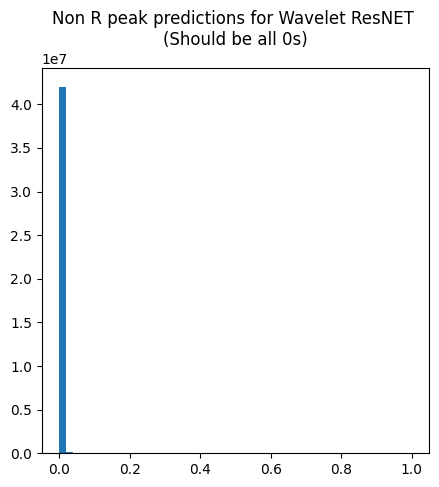

In [64]:
plt.figure(figsize=(5,5))
total = []
for x in hyps["Wavelet Style"].trues:
    for v in x:
        total.append(v)
plt.hist(total,bins=50)
plt.title("Non R peak predictions for Wavelet ResNET \n(Should be all 0s)")

Text(0.5, 1.0, 'Non R peak predictions for Wavelet \n(Should be all 0s)')

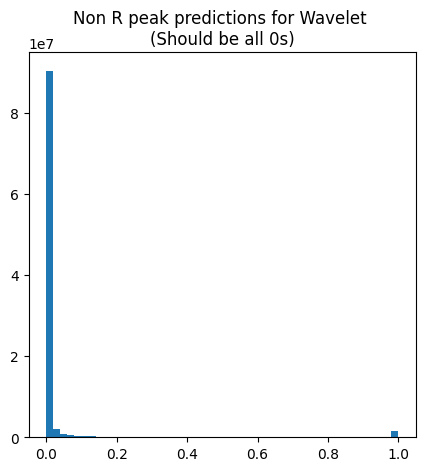

In [70]:
plt.figure(figsize=(5,5))
total = []
plt.hist(np.concatenate(hyps["Trainable Wavelet"].trues),bins=50)
plt.title("Non R peak predictions for Wavelet \n(Should be all 0s)")

## Restricting to the best models

## ResNET

## Wavelet ResNET

In [ ]:
exp = hypothesis_tests.HypothesisTest("Wavelet Style ResNet with 5 blocks TLA 0.5")
exp.get_r_peak_loss()

0 of 10, 

Text(0.5, 1.0, 'R peak predictions\nWavelet Style 5 blocks-0.5 (Should be all 1s)')

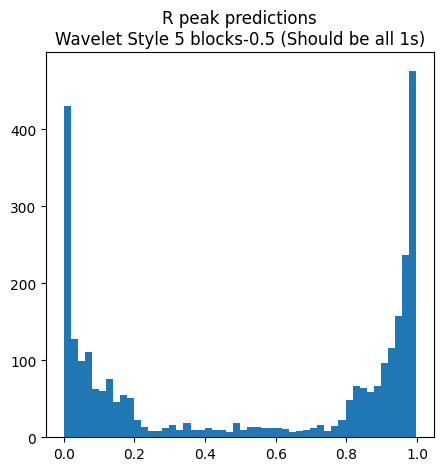

In [28]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.preds),bins=50)
plt.title("R peak predictions\nWavelet Style 5 blocks-0.5 (Should be all 1s)")

Text(0.5, 1.0, 'Non R peak predictions for Wavelet \n(Should be all 0s)')

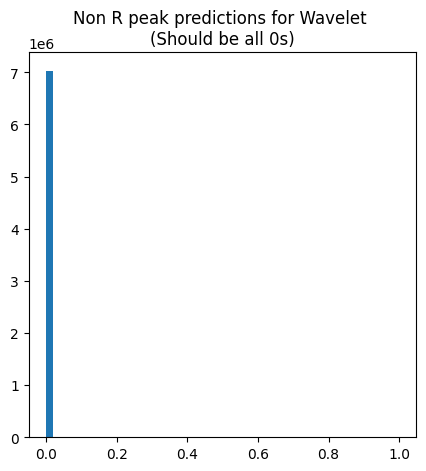

In [29]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.trues),bins=50)
plt.title("Non R peak predictions for Wavelet \n(Should be all 0s)")

In [30]:
exp = hypothesis_tests.HypothesisTest("Wavelet Style ResNet with 5 blocks TLA 0.05")
exp.get_r_peak_loss()

0 of 10, 

[8.200036,
 8.512023,
 8.344706,
 8.500001,
 0.5039633,
 0.11159135,
 0.10471651,
 0.18509881,
 1.5681775,
 1.0669754,
 0.7012817,
 0.58222646,
 0.43276748,
 0.08684807,
 0.082480475,
 0.09105112,
 0.5028951,
 0.09264829,
 0.08531508,
 0.08619869,
 4.3800793,
 4.641811,
 5.4377985,
 4.705205,
 1.4222347,
 0.19162142,
 0.3107546,
 0.729658,
 0.80204767,
 0.31328437,
 0.11703178,
 0.09257098,
 0.64013827,
 0.23516153,
 0.2632531,
 0.10943792,
 6.2436757,
 6.676759,
 6.4105315,
 6.389254,
 9.857214,
 9.115288,
 8.935896,
 9.840376,
 0.86856616,
 0.088385835,
 0.62734276,
 0.3722313,
 0.71112216,
 0.20620291,
 0.52605623,
 0.33762604,
 6.634722,
 6.603045,
 6.594599,
 6.233047,
 1.5290958,
 0.9924941,
 2.32028,
 1.4505984,
 0.89854664,
 0.107994914,
 0.09797428,
 0.101742506,
 0.74760234,
 0.41742134,
 0.56528085,
 0.22400342,
 0.9535335,
 0.15282641,
 0.8734824,
 0.31885132,
 0.8549949,
 0.8527,
 0.81894416,
 0.5827342,
 0.9834106,
 0.4672125,
 0.70210725,
 0.29115054,
 0.8461171,
 0.1807

Text(0.5, 1.0, 'R peak predictions\nWavelet Style 5 blocks-0.05 (Should be all 1s)')

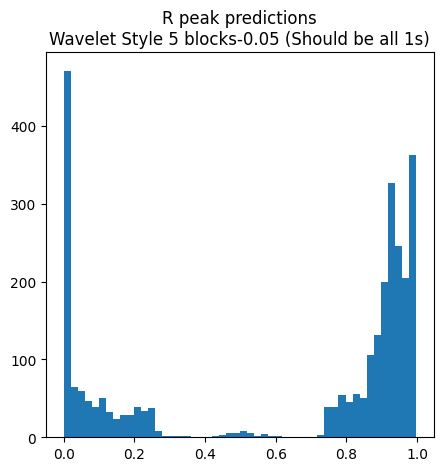

In [31]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.preds),bins=50)
plt.title("R peak predictions\nWavelet Style 5 blocks-0.05 (Should be all 1s)")

Text(0.5, 1.0, 'Non R peak predictions for Wavelet Style 5 blocks-0.05  \n(Should be all 0s)')

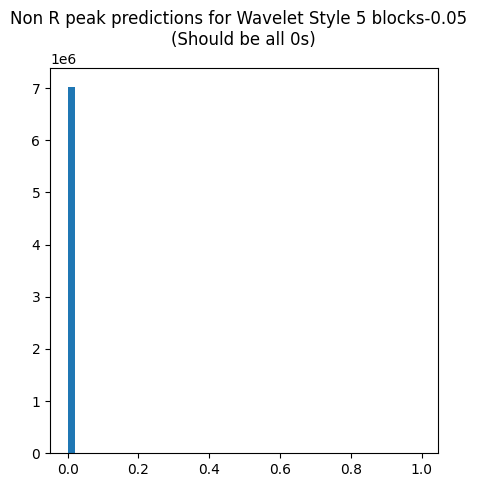

In [32]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.trues),bins=50)
plt.title("Non R peak predictions for Wavelet Style 5 blocks-0.05  \n(Should be all 0s)")

## Wavelet

In [33]:
exp = hypothesis_tests.HypothesisTest("TLA Min Grad 0.01 5-level Independent Trainable Wavelet")
exp.get_r_peak_loss()

0 of 10, 

[4.5335393,
 4.7725263,
 4.6749506,
 4.289388,
 3.8371587,
 3.878012,
 3.7944844,
 3.7150044,
 3.196836,
 3.5537539,
 2.290533,
 3.3222227,
 4.6475534,
 5.3105,
 4.8511686,
 5.235672,
 3.9545844,
 3.7488701,
 3.6108973,
 3.486173,
 2.8209774,
 2.6239526,
 2.639463,
 2.732118,
 4.050388,
 3.5762596,
 4.3993907,
 4.0425577,
 1.7805314,
 1.4104908,
 1.482171,
 1.4993846,
 3.3944085,
 2.9538987,
 3.2078295,
 3.253411,
 3.4764771,
 2.8807254,
 4.742222,
 4.331319,
 1.455294,
 1.0242836,
 1.1160175,
 1.1716795,
 3.0303254,
 2.2058117,
 2.4409444,
 2.0278194,
 3.4897609,
 3.1579132,
 3.2602952,
 3.1975508,
 2.6388698,
 2.5949054,
 2.5805159,
 2.5384448,
 4.9649806,
 5.5822797,
 5.784389,
 6.0030775,
 2.2610898,
 1.7324064,
 1.7678748,
 1.7396616,
 2.0421805,
 1.0091554,
 1.1735028,
 2.5261154,
 1.5953058,
 1.2802638,
 1.316038,
 1.3851918,
 1.7933922,
 1.1675218,
 1.3246034,
 1.4956938,
 5.573771,
 3.659662,
 2.7447133,
 4.9546347,
 4.611281,
 4.6271863,
 5.2285376,
 4.529908,
 4.4775696,
 2.

Text(0.5, 1.0, 'R peak predictions\nWavelet 0.01 5-level Independent (Should be all 1s)')

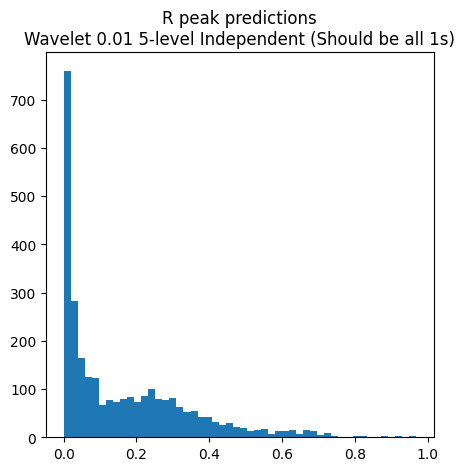

In [34]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.preds),bins=50)
plt.title("R peak predictions\nWavelet 0.01 5-level Independent (Should be all 1s)")

Text(0.5, 1.0, 'Non R peak predictions for 0.01 5-level Independent  \n(Should be all 0s)')

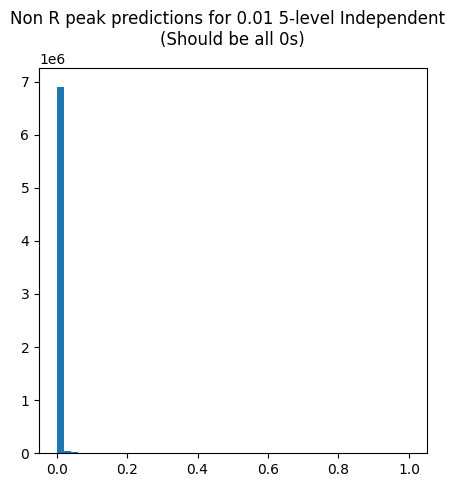

In [35]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.trues),bins=50)
plt.title("Non R peak predictions for 0.01 5-level Independent  \n(Should be all 0s)")

In [36]:
exp = hypothesis_tests.HypothesisTest("TLA Min Grad 0.05 5-level Shared QMF Trainable Wavelet")
exp.get_r_peak_loss()

0 of 10, 

[6.109868,
 5.835951,
 5.0560217,
 5.464308,
 5.567509,
 5.070235,
 5.3511496,
 5.4055095,
 3.69088,
 4.6949286,
 4.304452,
 4.5088344,
 5.1268606,
 5.1017303,
 5.2864933,
 5.607315,
 6.9308047,
 7.155031,
 6.648749,
 6.5068073,
 6.4701824,
 5.994443,
 6.7573104,
 6.9718895,
 6.875165,
 6.6205897,
 5.9591856,
 6.6490426,
 4.6655912,
 4.8457694,
 4.978762,
 4.9086714,
 6.0357604,
 6.125914,
 5.9044,
 6.21044,
 4.80804,
 5.0909624,
 4.803818,
 4.714261,
 3.8709555,
 3.5414357,
 3.562661,
 3.4748347,
 5.288654,
 5.4557085,
 5.3580966,
 5.909432,
 3.1217287,
 3.5694792,
 3.9123406,
 3.8450332,
 5.973247,
 5.4588757,
 5.5800195,
 5.5141807,
 4.538389,
 4.4913635,
 4.5318317,
 4.248926,
 3.0348687,
 2.7198017,
 2.6222758,
 2.6228008,
 3.1239014,
 2.7177331,
 2.6773117,
 2.8300405,
 5.67806,
 5.595015,
 4.74864,
 4.5176096,
 2.6645982,
 2.364716,
 2.7333527,
 2.2665699,
 3.5135803,
 2.4604523,
 1.6249465,
 2.4071062,
 3.2506332,
 2.5885868,
 2.6831741,
 2.9004772,
 3.0781884,
 3.0791712,
 2.7

Text(0.5, 1.0, 'R peak predictions\nWavelet  0.05 5-level Shared QMF (Should be all 1s)')

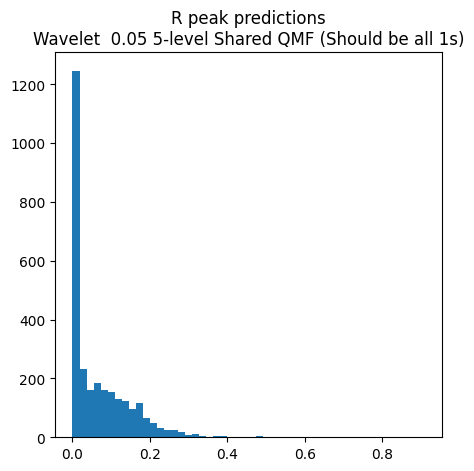

In [37]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.preds),bins=50)
plt.title("R peak predictions\nWavelet  0.05 5-level Shared QMF (Should be all 1s)")

Text(0.5, 1.0, 'Non R peak predictions for 0.05 5-level Shared QMF  \n(Should be all 0s)')

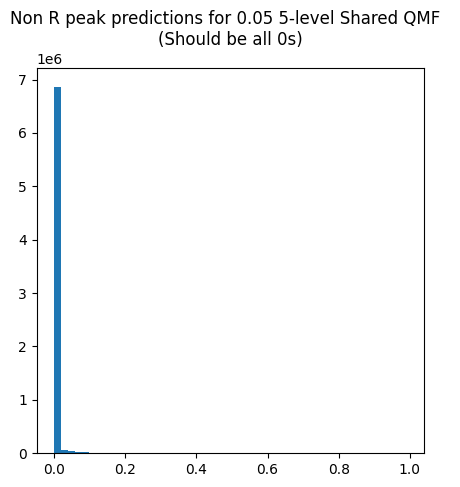

In [38]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.trues),bins=50)
plt.title("Non R peak predictions for 0.05 5-level Shared QMF  \n(Should be all 0s)")

In [39]:
exp = hypothesis_tests.HypothesisTest("TLA Min Grad 0.05 5-level Independent Trainable Wavelet")
exp.get_r_peak_loss()

0 of 10, 

[2.9029212,
 2.915676,
 2.3826604,
 2.608504,
 0.01308848,
 0.005490828,
 0.009314837,
 0.001883282,
 0.036526334,
 0.89091367,
 0.0009806213,
 0.03846844,
 0.008091396,
 0.00025379256,
 0.00012488646,
 0.0011096203,
 4.0030465,
 4.4635453,
 3.8255692,
 4.968758,
 1.6363621,
 1.2774665,
 1.503772,
 1.3616968,
 2.3965588,
 1.9196007,
 2.0665233,
 2.0660973,
 8.440755,
 8.447961,
 8.306655,
 9.229614,
 2.6928198,
 2.1189837,
 2.46203,
 2.062272,
 2.310112,
 1.9033791,
 1.8594782,
 1.8979405,
 3.7382538,
 3.3759513,
 3.6514814,
 3.4512117,
 1.4243768,
 1.2109742,
 1.2993752,
 1.3090405,
 8.981122,
 9.91836,
 9.710419,
 9.591234,
 0.19029598,
 0.12228985,
 0.74034667,
 0.17605993,
 2.255395,
 2.0115147,
 2.0353765,
 1.9390836,
 1.5328217,
 1.6533787,
 1.4992697,
 1.3746237,
 1.9347739,
 0.90205777,
 1.0289761,
 2.0167453,
 1.8057417,
 1.5043749,
 1.5541441,
 1.5418789,
 1.1928945,
 0.8187108,
 0.6634253,
 0.8243595,
 2.3745284,
 1.5812773,
 1.4438791,
 1.3200616,
 3.408376,
 2.8034155,
 4.

Text(0.5, 1.0, 'R peak predictions\nWavelet 0.05 5-level Independent  (Should be all 1s)')

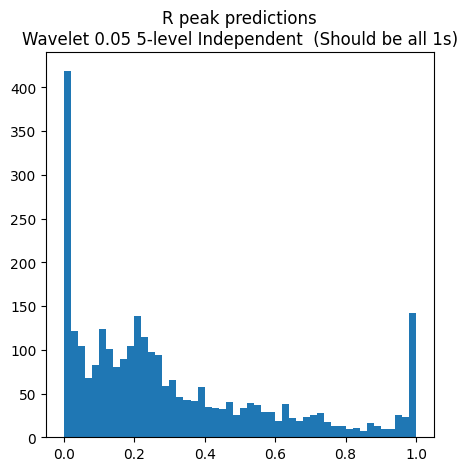

In [40]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.preds),bins=50)
plt.title("R peak predictions\nWavelet 0.05 5-level Independent  (Should be all 1s)")

Text(0.5, 1.0, 'Non R peak predictions for 0.05 5-level Independent  \n(Should be all 0s)')

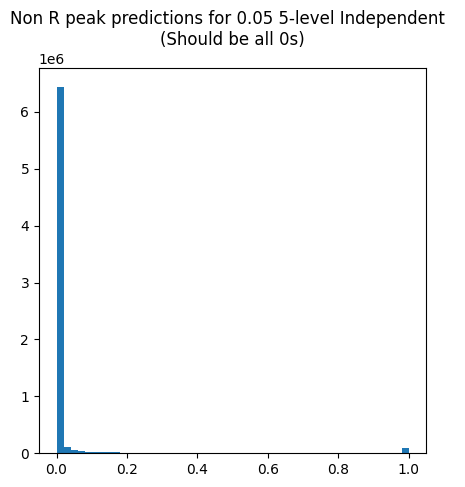

In [41]:
plt.figure(figsize=(5,5))
plt.hist(np.concatenate(exp.trues),bins=50)
plt.title("Non R peak predictions for 0.05 5-level Independent  \n(Should be all 0s)")